In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn import cluster
import urllib
from tools import pca_reduce, plot

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [12., 8.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

# Culstering Examples

## Handwritten digits (MNIST)

Dataset of 70'000 handwritten digit images of 28x28 pixel each

In [10]:
fname = 'mnist.npz'
#fname = 'galaxy.npz'

X = np.load(fname)['X']
y = np.load(fname)['y']

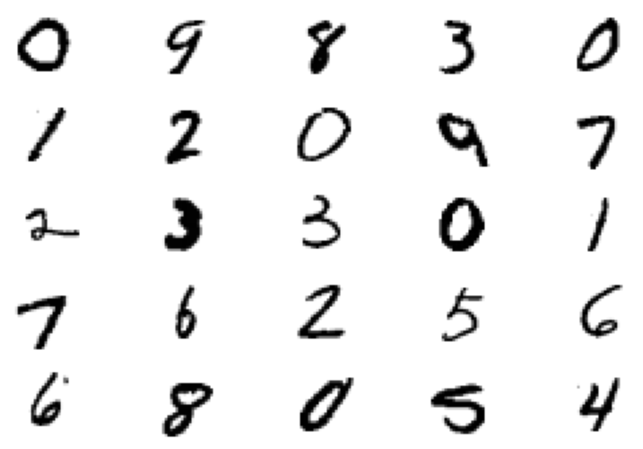

In [11]:
plot(X)

Since the original data dimension is 784 (= 28 x 28), we will use PCA to reduce this (More explanation under the `prepreocessing` notebook)

In [23]:
X_reduced = pca_reduce(X, 20)

In [24]:
centroids, labels, _ = cluster.k_means(X_reduced, 10)

Let's visualize the cluster assignments in a plot of the first 2 PCA components

Text(0, 0.5, 'component 2')

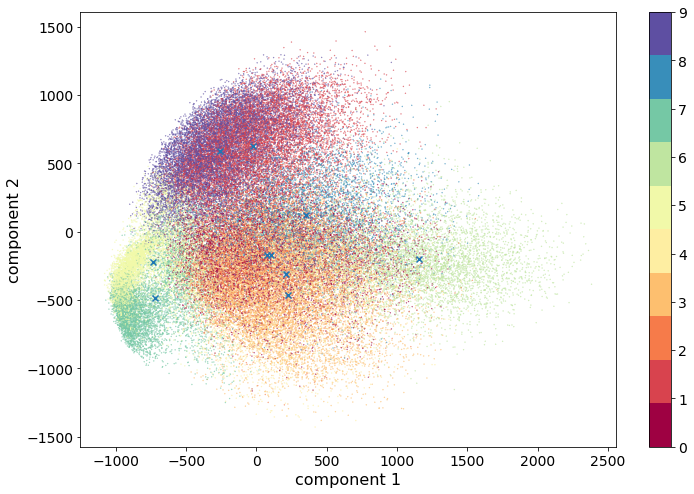

In [25]:
plt_data = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, s=0.1, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar()
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x')
plt.xlabel('component 1')
plt.ylabel('component 2')
#plt.savefig('mnist_pca2_kmeans_cluster.png', bbox_inches='tight')

We can see how well the separation of digits worked doing a heatmap

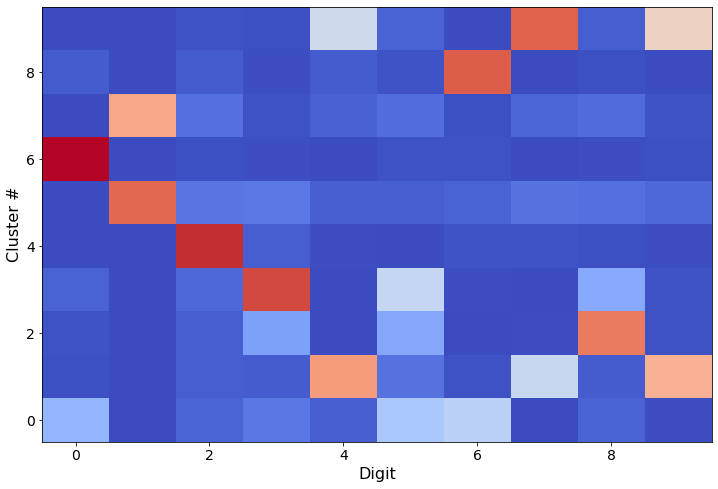

In [26]:
h = plt.hist2d(y, labels, bins=[np.linspace(-0.5,9.5, 11),
                                 np.linspace(-0.5,np.max(labels)+0.5, int(np.max(labels)+2))
                                ]
                         ,cmap='coolwarm');
plt.gca().set_xlabel('Digit')
plt.gca().set_ylabel('Cluster #')
plt.savefig('mnist_confusion.png', bbox_inches='tight')

Let's check the content of some clusters:

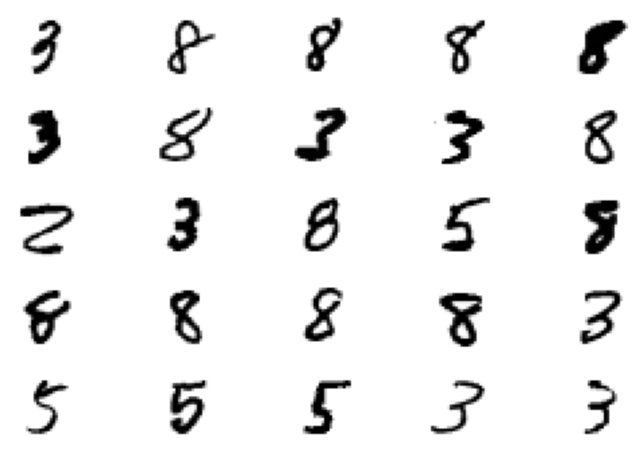

In [27]:
plot(X[labels == 2])

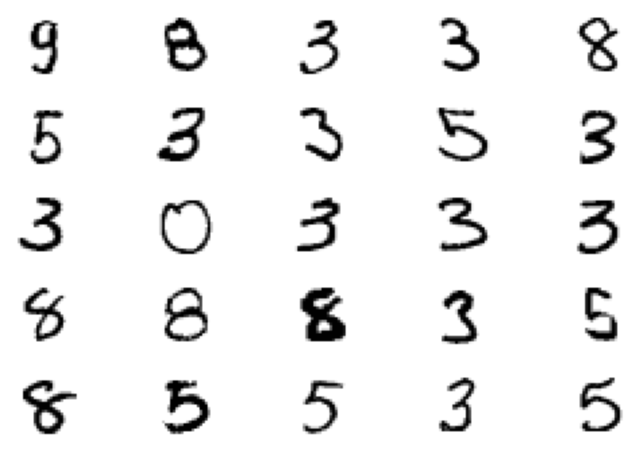

In [28]:
plot(X[labels == 3])

# Chipotle locations in the US

Chipotle (mexican fast fod chain) locations in longitude / latitude

In [29]:
# obtain file from https://www.kaggle.com/jeffreybraun/chipotle-locations
df = pd.read_csv('chipotle_stores.csv')

In [30]:
df

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220
...,...,...,...,...,...
2624,Wisconsin,Pleasant Prairie,"9370 76th St # B Pleasant Prairie, WI 53158 US",42.565892,-87.921048
2625,Wisconsin,Wauwatosa,"2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US",43.067723,-88.048222
2626,North Dakota,Fargo,"1204 19th Ave N Fargo, ND 58102 US",46.904247,-96.796618
2627,North Dakota,Fargo,"1680 45th St S Fargo, ND 58103 US",46.855337,-96.861416


In [31]:
X = df[['longitude', 'latitude']].values

In [36]:
! wget 'https://eriqande.github.io/rep-res-web/lectures/lecture_figs/making-maps-unnamed-chunk-12-1.png'
us_img = plt.imread("making-maps-unnamed-chunk-12-1.png")

--2022-09-06 11:08:12--  https://eriqande.github.io/rep-res-web/lectures/lecture_figs/making-maps-unnamed-chunk-12-1.png
Resolving eriqande.github.io (eriqande.github.io)... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to eriqande.github.io (eriqande.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256065 (250K) [image/png]
Saving to: ‘making-maps-unnamed-chunk-12-1.png.4’

making-maps-unnamed 100%[===================>] 250.06K  --.-KB/s    in 0.05s   

2022-09-06 11:08:12 (5.12 MB/s) - ‘making-maps-unnamed-chunk-12-1.png.4’ saved [256065/256065]



(25.0, 50.0)

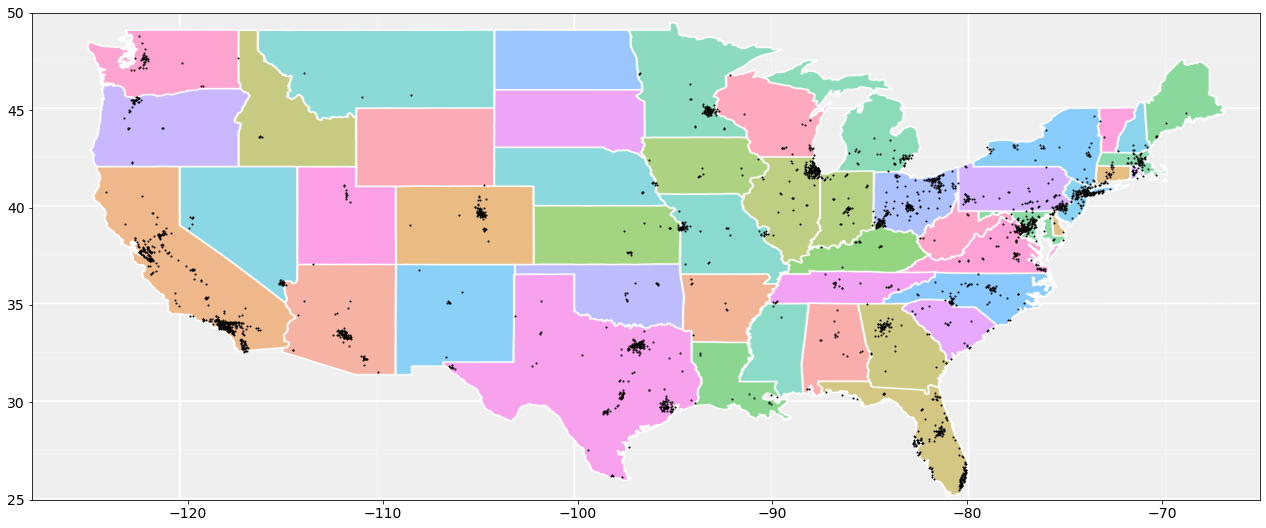

In [37]:
fig, ax = plt.subplots(1,1, figsize=(22,15))
ax.imshow(us_img,zorder=0,extent=[-132, -62.5, 18, 55], alpha=0.5)
ax.scatter(df.longitude, df.latitude, s=1, c='k')

ax.set_xlim(-128, -65)
ax.set_ylim(25, 50)

## K-means

In [38]:
centroids, labels, _ = cluster.k_means(X, 48)

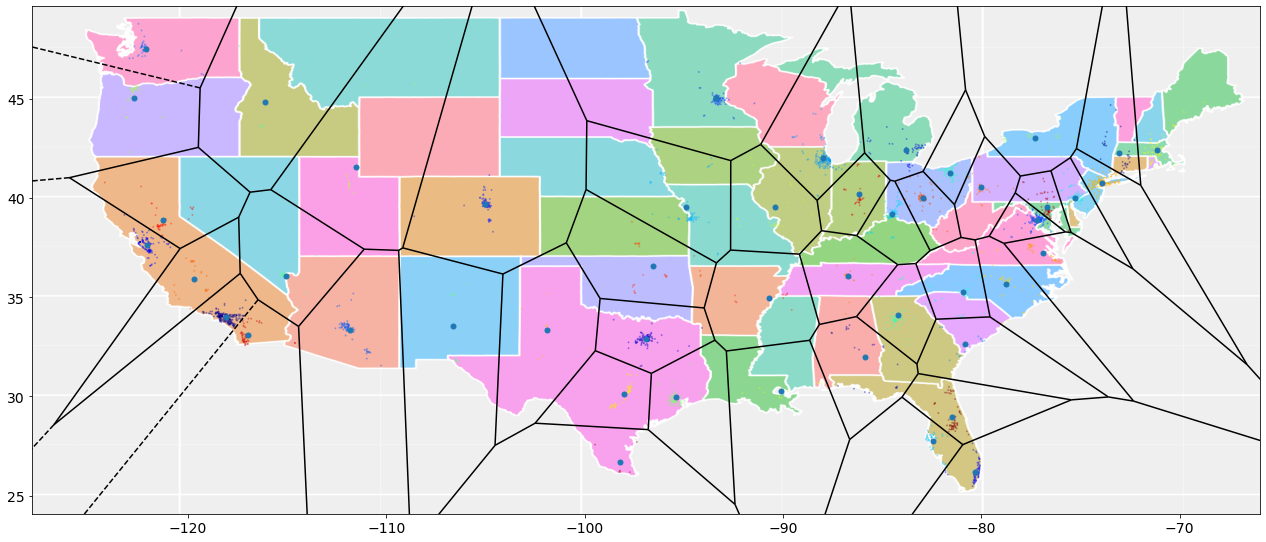

In [39]:
fig, ax = plt.subplots(1,1, figsize=(22,15))

plt.imshow(us_img,zorder=0,extent=[-132, -62.5, 18, 55], alpha=0.5)

vor = Voronoi(centroids,)
voronoi_plot_2d(vor, ax=plt.gca(), line_colors='k', show_vertices=False, show_points=True, point_size=10, line_width=1.5);

plt.scatter(df.longitude, df.latitude, s=1, c=labels, cmap='jet', alpha=0.3)

## DBSCAN

In [40]:
core_samples, labels = cluster.dbscan(X, eps=0.5, min_samples=10)

In [43]:
np.max(labels)

35

(25.0, 50.0)

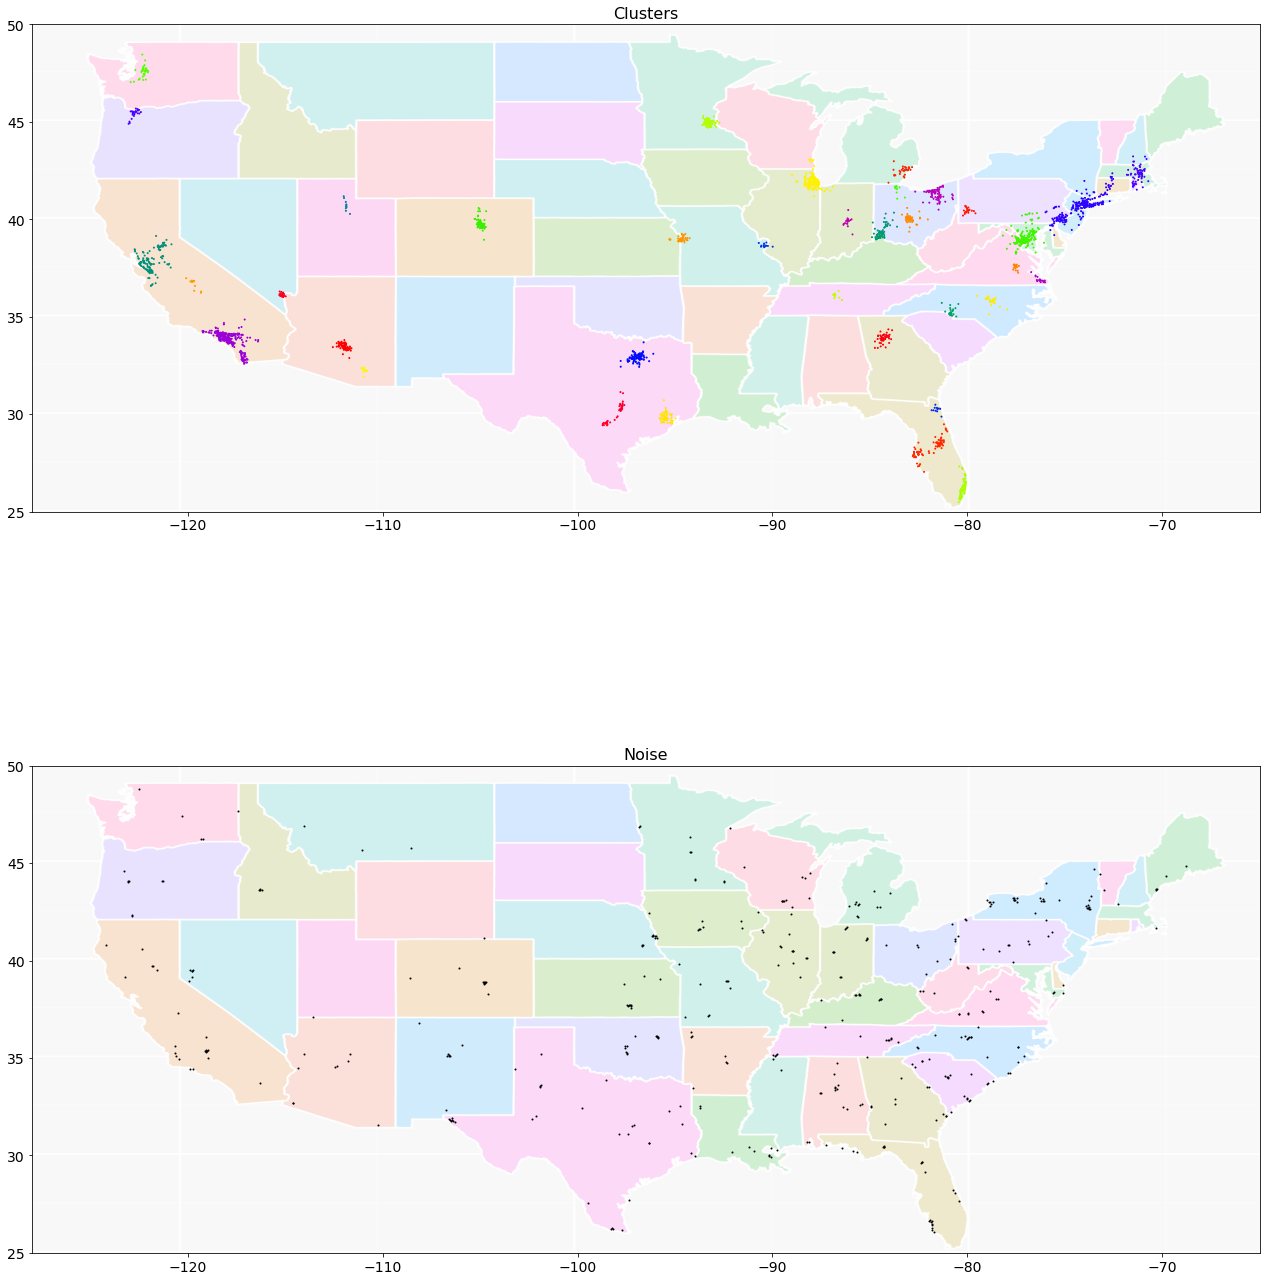

In [41]:
fig, ax = plt.subplots(2,1, figsize=(22,25))

mask = labels >= 0

ax[0].scatter(df.longitude[mask], df.latitude[mask], s=1, c=labels[mask], cmap='prism')
ax[0].set_title('Clusters')

ax[0].imshow(us_img,zorder=0,extent=[-132, -62.5, 18, 55], alpha=0.2)
ax[0].set_xlim(-128, -65)
ax[0].set_ylim(25, 50)

ax[1].scatter(df.longitude[~mask], df.latitude[~mask], s=1, c='k')
ax[1].set_title('Noise')

ax[1].imshow(us_img,zorder=0,extent=[-132, -62.5, 18, 55], alpha=0.2)
ax[1].set_xlim(-128, -65)
ax[1].set_ylim(25, 50)

# Air-BnB locations in NYC

In [45]:
# obtain file from https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
df = pd.read_csv('AB_NYC_2019.csv')

In [46]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [47]:
X = df[['longitude', 'latitude']].values

In [48]:
#loading the png NYC image found on Google and saving to my local folder along with the project
! wget 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'
nyc_img=plt.imread("Neighbourhoods_New_York_City_Map.PNG")

--2022-09-06 11:10:44--  https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 208.80.154.238, 208.80.153.231, ...
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87105 (85K) [image/png]
Saving to: ‘Neighbourhoods_New_York_City_Map.PNG.2’

Neighbourhoods_New_ 100%[===================>]  85.06K  --.-KB/s    in 0.09s   

2022-09-06 11:10:44 (999 KB/s) - ‘Neighbourhoods_New_York_City_Map.PNG.2’ saved [87105/87105]



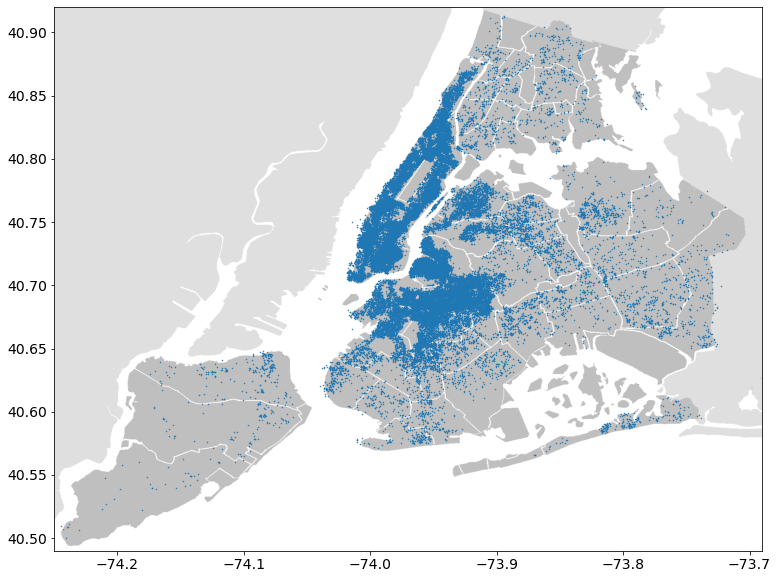

In [49]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
plt.imshow(nyc_img, zorder=0, extent = [-74.25, -73.69, 40.49, 40.92], alpha=0.5)
plt.plot(df.longitude, df.latitude, '.', ms=1)

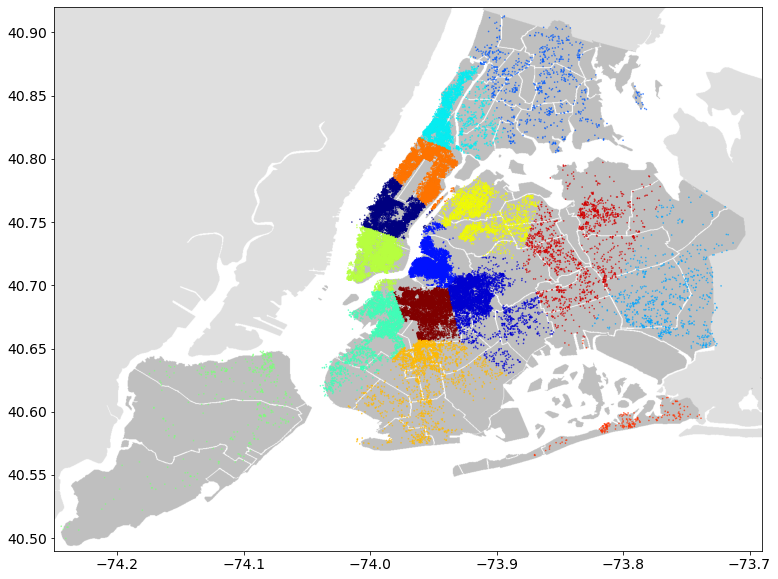

In [50]:
centroids, labels,_ = cluster.k_means(X, n_clusters=15)

fig, ax = plt.subplots(1,1, figsize=(15,10))
plt.imshow(nyc_img, zorder=0, extent = [-74.25, -73.69, 40.49, 40.92], alpha=0.5)

plt.scatter(df.longitude, df.latitude, s=0.4, c=labels, cmap='jet', alpha=0.7)

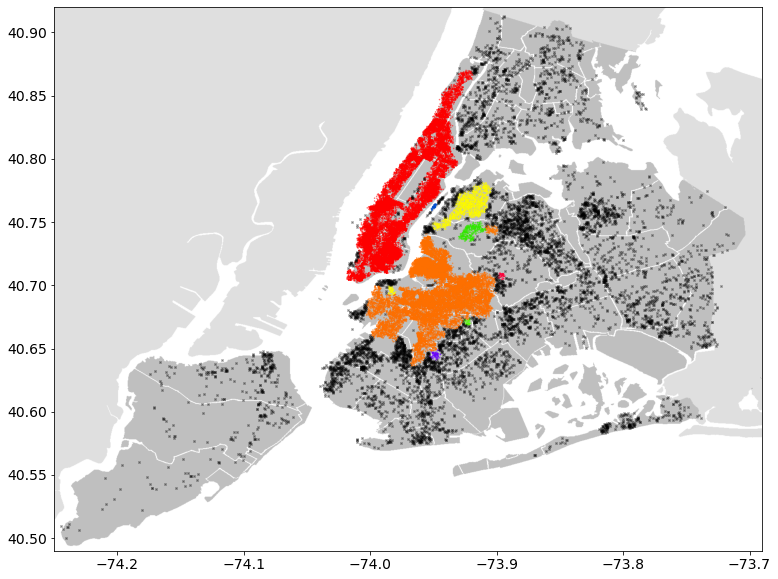

In [51]:
core_samples, labels = cluster.dbscan(X, eps=0.003, min_samples=50)

fig, ax = plt.subplots(1,1, figsize=(15,10))
plt.imshow(nyc_img, zorder=0, extent = [-74.25, -73.69, 40.49, 40.92], alpha=0.5)

mask = labels >= 0
plt.scatter(df.longitude[mask], df.latitude[mask], s=0.4, c=labels[mask], cmap='prism', alpha=0.5)
plt.plot(df.longitude[~mask], df.latitude[~mask], 'x', c='k', ms=2, alpha=0.5)